# <span style="font-family:Papyrus; font-size:2em;">Recursion Cellular Image Classification</span>
# <span style="font-family:Papyrus; font-size:1em;">CellSignal: Disentangling biological signal from experimental noise in cellular images</span>

![](https://assets.website-files.com/5cb63fe47eb5472014c3dae6/5d040176f0a2fd66df939c51_figure1%400.75x.png)

<br>
## [Competition Resources](https://www.kaggle.com/c/recursion-cellular-image-classification/overview/resources)
## [RXRX](https://www.rxrx.ai/)
## [Tutorials](https://github.com/recursionpharma/rxrx1-utils)

<br>
# How to visualize images in RxRx1

The RxRx1 cellular image dataset is made up of 6-channel images, where each channel illuminates different parts of the cell (visit [RxRx.ai](https://www.rxrx.ai/) for details). This notebook demonstrates how to use the code in [rxrx1-utils](https://github.com/recursionpharma/rxrx1-utils) to load and visualize the RxRx1 images.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))
import sys
import matplotlib.pyplot as plt
%matplotlib inline

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../input'

In [2]:
!git clone https://github.com/recursionpharma/rxrx1-utils
print ('rxrx1-utils cloned!')

Cloning into 'rxrx1-utils'...
remote: Enumerating objects: 115, done.
remote: Total 115 (delta 0), reused 0 (delta 0), pack-reused 115
Receiving objects: 100% (115/115), 1.59 MiB | 0 bytes/s, done.
Resolving deltas: 100% (57/57), done.
rxrx1-utils cloned!


In [3]:
!ls

__notebook_source__.ipynb  rxrx1-utils


In [5]:
sys.path.append('rxrx1-utils')
import rxrx.io as rio

# Loading a site and visualizing individual channels

Use load_site to get the 512 x 512 x 6 image tensor for a site. The arguments you pass to load_site tell it which image you want. In the example below, from the train set, we request the image in experiment RPE-05 on plate 3 in well D19 at site 2.

In [8]:
t = rio.load_site('train', 'RPE-05', 3, 'D20', 2)
t.shape

(512, 512, 6)

At this point, you can visualize the individual channels.

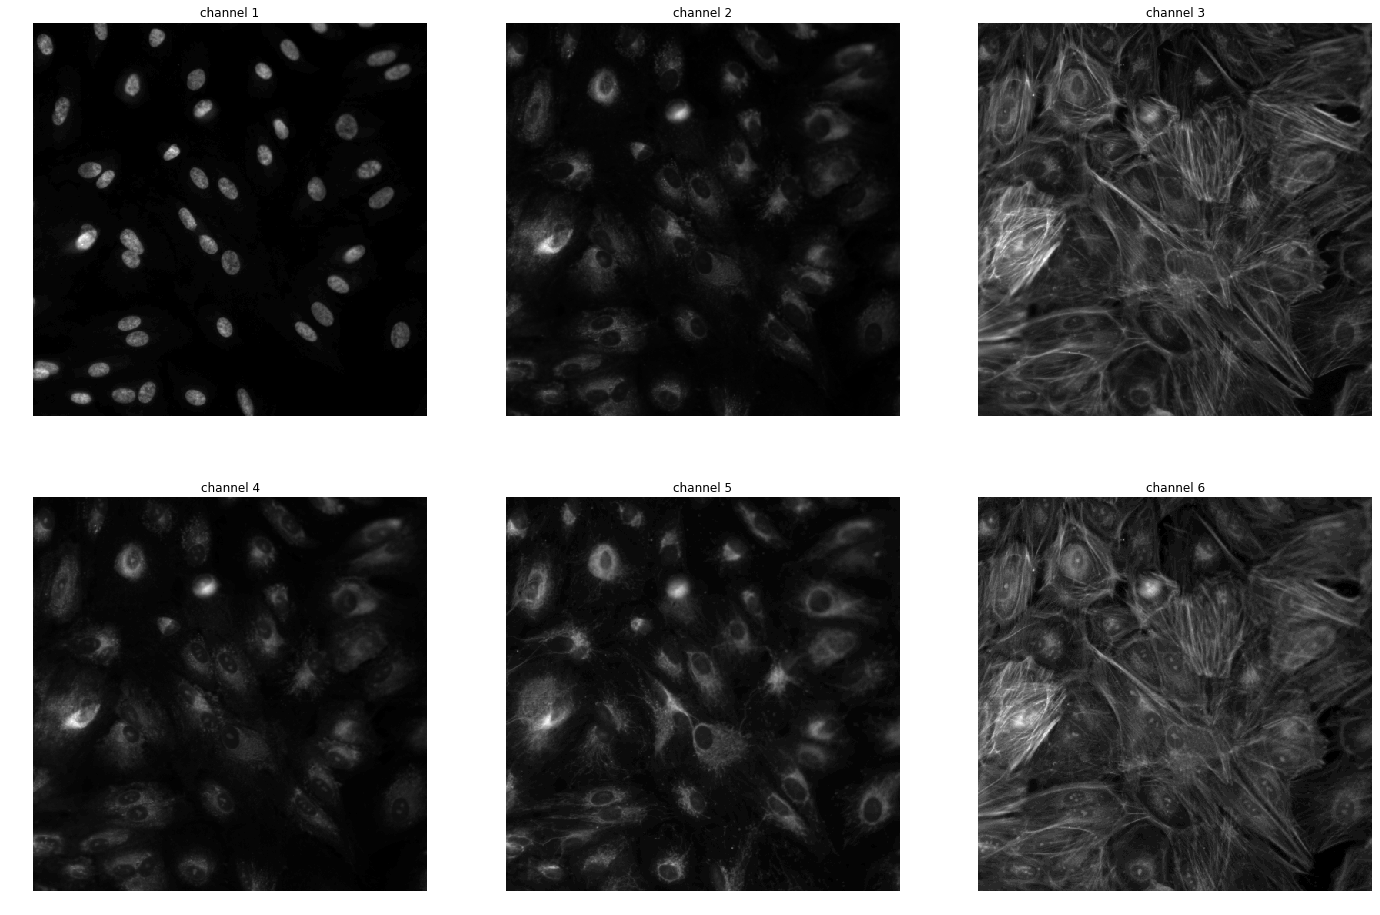

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(24, 16))

for i, ax in enumerate(axes.flatten()):
  ax.axis('off')
  ax.set_title('channel {}'.format(i + 1))
  _ = ax.imshow(t[:, :, i], cmap='gray')

The function load_site takes an optional base_path argument that defaults to *gs://rxrx1-us-central1/images*, one of the two Google Cloud Storage buckets containing the RxRx1 image set. You can also set base_path to the path of your local copy of the dataset, and this is how you'll typically want to work with this function.

# Converting a site to RGB format

In order to visualize all six channels at once, use **convert_tensor_to_rgb**. It associates an RGB color with each channel, then aggregates the color channels across the six cellular channels.



In [10]:
x = rio.convert_tensor_to_rgb(t)
x.shape

(512, 512, 3)

Now plot your RGB image.

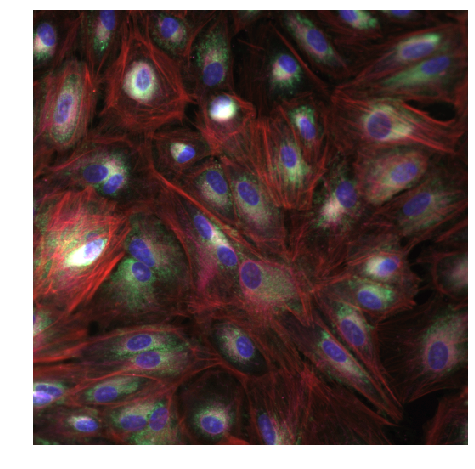

In [11]:
plt.figure(figsize=(8, 8))
plt.axis('off')

_ = plt.imshow(x)

# Load and convert to RGB
For convenience, there is a wrapper around these two functions called ```load_site_as_rgb``` with the same signature as ```load_site```.

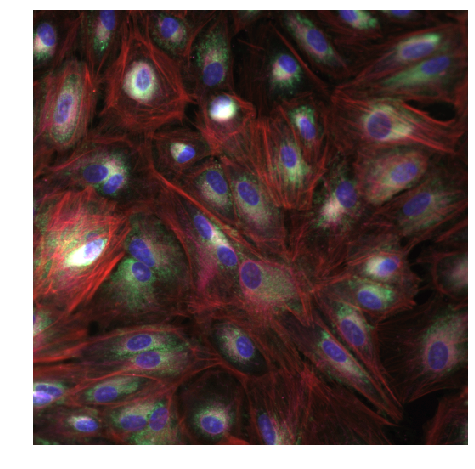

In [15]:
y = rio.load_site_as_rgb('train', 'RPE-05', 3, 'D20', 2)

plt.figure(figsize=(8, 8))
plt.axis('off')

_ = plt.imshow(y)

Beautiful images, aren't they?

# Combining competition metadata
The metadata for RxRx1 during the Kaggle competition is broken up into four files: 
- ```train.csv```
- ```train_controls.csv```
- ```test.csv```
- ```test_controls.csv```. 

It is often more convenient to view all the metadata at once, so we have provided a helper function called combine_metadata for doing just that.

In [16]:
md = rio.combine_metadata()
md.head()

,cell_type,dataset,experiment,plate,sirna,site,well,well_type
id_code,,,,,,,,
HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,1138.0,1,B02,negative_control
HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,1138.0,2,B02,negative_control
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,NaN,1,B03,treatment
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,NaN,2,B03,treatment
HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,NaN,1,B04,treatment


The combined metadata adds a ```cell_type``` and dataset column, and specifies a well_type of "treament" for all non-control sirna. Note that the sirna column has **NaNs** for the non-control test images since those labels are not available during the competition (they are from the wells that need to be predicted), which forces the sirna column to be of type float.

# EDA

### File Description
- **[train/test].zip:** the image data. The image paths, such as ```U2OS-01/Plate1/B02_s2_w3.png```, can be read as:

    - Cell line and batch number (U2OS batch 1)
    - Plate number (1)
    - Well location on plate (column B, row 2)
    - Site (2)
    - Microscope channel (3)

Please note that the **[train/test].csv** and **[train/test]_controls.csv** combined describe the images found in **[train/test].zip.** You will only be making predictions on the images listed in **test.csv**, not on all the images found in **test.zip**.

- **[train/test].csv**
    - id_code
    - experiment: the cell type and batch number
    - plate: plate number within the experiment
    - well: location on the plate
    - sirna: the target

- **[train/test]_controls.csv** In each experiment, the same 30 siRNAs appear on every plate as positive controls. In addition, there is one well per plate with untreated cells as a negative control. It has the same schema as **[train/test].csv**, plus a ```well_type``` field denoting the type of control.

**pixel_stats.csv** Provides the mean, standard deviation, median, min, and max pixel values for each channel of each image.
**sample_submission.csv** A valid sample submission.

In [17]:
import seaborn as sns

In [19]:
md.head(10)

,cell_type,dataset,experiment,plate,sirna,site,well,well_type
id_code,,,,,,,,
HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,1138.0,1,B02,negative_control
HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,1138.0,2,B02,negative_control
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,NaN,1,B03,treatment
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,NaN,2,B03,treatment
HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,NaN,1,B04,treatment
HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,NaN,2,B04,treatment
HEPG2-08_1_B05,HEPG2,test,HEPG2-08,1,NaN,1,B05,treatment
HEPG2-08_1_B05,HEPG2,test,HEPG2-08,1,NaN,2,B05,treatment
HEPG2-08_1_B06,HEPG2,test,HEPG2-08,1,NaN,1,B06,treatment


In [20]:
md.index

Index(['HEPG2-08_1_B02', 'HEPG2-08_1_B02', 'HEPG2-08_1_B03', 'HEPG2-08_1_B03',
       'HEPG2-08_1_B04', 'HEPG2-08_1_B04', 'HEPG2-08_1_B05', 'HEPG2-08_1_B05',
       'HEPG2-08_1_B06', 'HEPG2-08_1_B06',
       ...
       'U2OS-03_4_O19', 'U2OS-03_4_O19', 'U2OS-03_4_O20', 'U2OS-03_4_O20',
       'U2OS-03_4_O21', 'U2OS-03_4_O21', 'U2OS-03_4_O22', 'U2OS-03_4_O22',
       'U2OS-03_4_O23', 'U2OS-03_4_O23'],
      dtype='object', name='id_code', length=125510)

### Unique values

In [21]:
for i in md.columns:
    print (">> ",i,"\t", md[i].unique())

>>  cell_type 	 ['HEPG2' 'HUVEC' 'RPE' 'U2OS']
>>  dataset 	 ['test' 'train']
>>  experiment 	 ['HEPG2-08' 'HEPG2-09' 'HEPG2-10' 'HEPG2-11' 'HUVEC-17' 'HUVEC-18'
 'HUVEC-19' 'HUVEC-20' 'HUVEC-21' 'HUVEC-22' 'HUVEC-23' 'HUVEC-24'
 'RPE-08' 'RPE-09' 'RPE-10' 'RPE-11' 'U2OS-04' 'U2OS-05' 'HEPG2-01'
 'HEPG2-02' 'HEPG2-03' 'HEPG2-04' 'HEPG2-05' 'HEPG2-06' 'HEPG2-07'
 'HUVEC-01' 'HUVEC-02' 'HUVEC-03' 'HUVEC-04' 'HUVEC-05' 'HUVEC-06'
 'HUVEC-07' 'HUVEC-08' 'HUVEC-09' 'HUVEC-10' 'HUVEC-11' 'HUVEC-12'
 'HUVEC-13' 'HUVEC-14' 'HUVEC-15' 'HUVEC-16' 'RPE-01' 'RPE-02' 'RPE-03'
 'RPE-04' 'RPE-05' 'RPE-06' 'RPE-07' 'U2OS-01' 'U2OS-02' 'U2OS-03']
>>  plate 	 [1 2 3 4]
>>  sirna 	 [1138.   nan 1137. ...  568.  978.  176.]
>>  site 	 [1 2]
>>  well 	 ['B02' 'B03' 'B04' 'B05' 'B06' 'B07' 'B08' 'B09' 'B10' 'B11' 'B12' 'B13'
 'B14' 'B15' 'B16' 'B17' 'B18' 'B19' 'B20' 'B21' 'B22' 'B23' 'C02' 'C03'
 'C04' 'C05' 'C06' 'C07' 'C08' 'C09' 'C10' 'C11' 'C12' 'C13' 'C14' 'C15'
 'C16' 'C17' 'C18' 'C19' 'C20' 'C21' 'C

cell_type
HUVEC    59050
HEPG2    27094
RPE      27070
U2OS     12296
Name: cell_type, dtype: int64


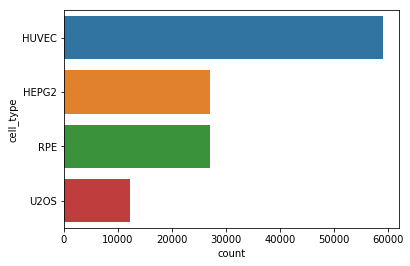

dataset
train    81224
test     44286
Name: dataset, dtype: int64


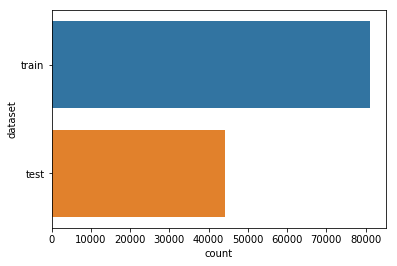

experiment
U2OS-04     2464
HUVEC-03    2464
HUVEC-09    2464
HUVEC-01    2464
RPE-02      2464
RPE-08      2464
RPE-10      2464
HUVEC-02    2464
HUVEC-07    2464
HEPG2-10    2464
RPE-06      2464
HUVEC-11    2464
HEPG2-03    2464
RPE-01      2464
U2OS-01     2464
HUVEC-20    2464
HEPG2-04    2464
HUVEC-05    2464
HUVEC-04    2464
HUVEC-24    2464
HUVEC-16    2464
RPE-03      2464
HUVEC-12    2464
HUVEC-21    2464
HEPG2-06    2464
HEPG2-01    2464
HEPG2-09    2464
HUVEC-10    2464
HUVEC-17    2464
HUVEC-08    2464
HUVEC-19    2464
RPE-07      2464
U2OS-02     2464
RPE-05      2464
HEPG2-02    2464
HEPG2-05    2464
HUVEC-22    2464
U2OS-03     2464
HUVEC-06    2462
HUVEC-23    2462
RPE-04      2462
HUVEC-18    2462
RPE-09      2462
HEPG2-08    2462
HEPG2-07    2460
HEPG2-11    2460
HUVEC-13    2448
U2OS-05     2440
RPE-11      2434
HUVEC-15    2432
HUVEC-14    2432
Name: experiment, dtype: int64


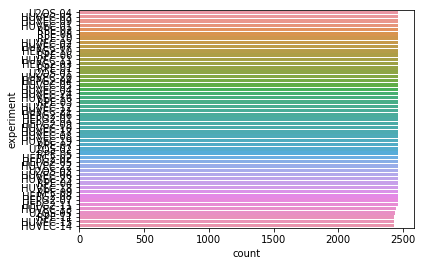

plate
3    31380
1    31380
2    31378
4    31372
Name: plate, dtype: int64


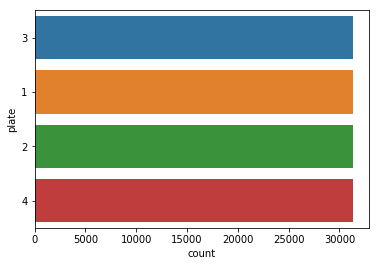

site
2    62755
1    62755
Name: site, dtype: int64


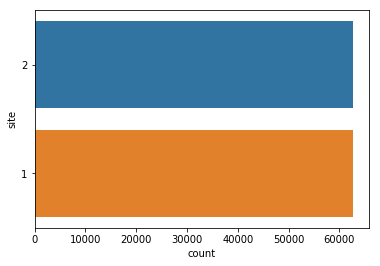

well_type
treatment           112824
positive_control     12194
negative_control       492
Name: well_type, dtype: int64


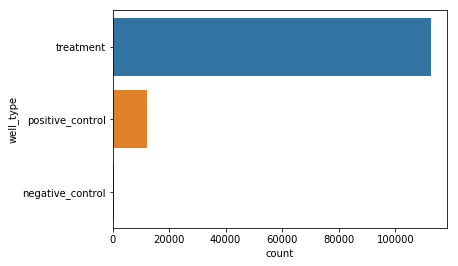

In [23]:
for col in ['cell_type', 'dataset', 'experiment', 'plate',  'site', 'well_type']:
    print (col)
    print (md[col].value_counts())
    sns.countplot(y = col,
              data = md,
              order = md[col].value_counts().index)
    plt.show()
    

### Missing

In [24]:
missing_values_count = md.isnull().sum()
missing_values_count

cell_type         0
dataset           0
experiment        0
plate             0
sirna         39794
site              0
well              0
well_type         0
dtype: int64

In [25]:
md = md.fillna(0)
md.head()

,cell_type,dataset,experiment,plate,sirna,site,well,well_type
id_code,,,,,,,,
HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,1138.0,1,B02,negative_control
HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,1138.0,2,B02,negative_control
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,0.0,1,B03,treatment
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,0.0,2,B03,treatment
HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,0.0,1,B04,treatment


### sirna distribution

In [26]:
train_df = md[md['dataset'] == 'train']
test_df = md[md['dataset'] == 'test']

train_df.shape, test_df.shape

((81224, 8), (44286, 8))

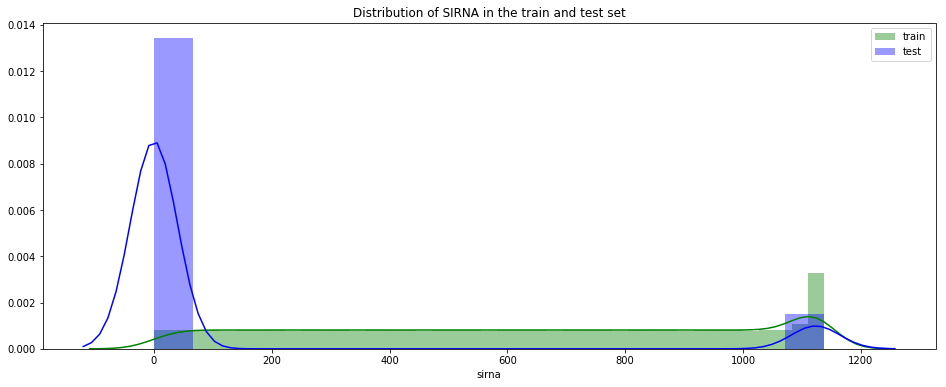

In [27]:
plt.figure(figsize=(16,6))
plt.title("Distribution of SIRNA in the train and test set")
sns.distplot(train_df.sirna,color="green", kde=True,bins='auto', label='train')
sns.distplot(test_df.sirna,color="blue", kde=True, bins='auto', label='test')
plt.legend()
plt.show()

Remember, 0s were NaNs

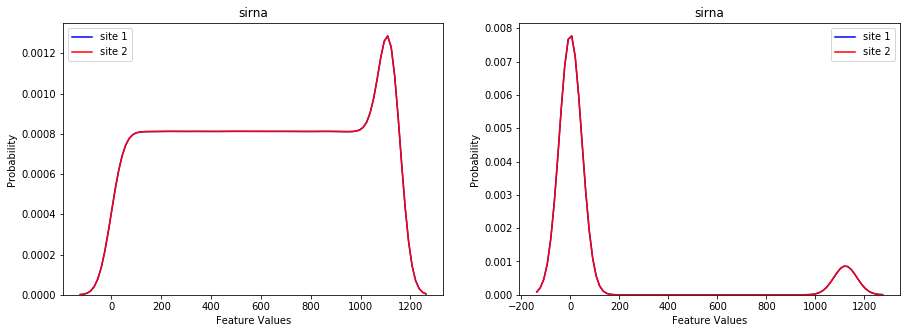

In [28]:
feat1 = 'sirna'
fig = plt.subplots(figsize=(15, 5))

# train
plt.subplot(1, 2, 1)
sns.kdeplot(train_df[feat1][train_df['site'] == 1], shade=False, color="b", label = 'site 1')
sns.kdeplot(train_df[feat1][train_df['site'] == 2], shade=False, color="r", label = 'site 2')
plt.title(feat1)
plt.xlabel('Feature Values')
plt.ylabel('Probability')

# test
plt.subplot(1, 2, 2)
sns.kdeplot(test_df[feat1][test_df['site'] == 1], shade=False, color="b", label = 'site 1')
sns.kdeplot(test_df[feat1][test_df['site'] == 2], shade=False, color="r", label = 'site 2')
plt.title(feat1)
plt.xlabel('Feature Values')
plt.ylabel('Probability')
plt.show()

In [29]:
# Prevent: Output path '/rxrx1-utils/.git/logs/refs/remotes/origin/HEAD' contains too many nested subdirectories (max 6)
!rm -r  rxrx1-utils
!ls

__notebook_source__.ipynb


# To Be Continued ...